# Telecom Churn Analysis

**Author:** Dan Lee

## Business Problem
A startup telecommunications company has hired us to provide business recommendations specifically for current customer retention. Our recommendations will significantly shape the company's strategy regarding customer churn. Customers are the greatest asset an organization can have. The longer a customer stays with a company, the more valuable they are because they are paying for more goods and services over time. Since it can cost a company [5 times](https://www.invespcro.com/blog/customer-acquisition-retention/) as much to acquire a new customer as it can to keep one, proper churn management is essential to the success of any organiziation.

The question we will attempt to answer is:

**How reliably can we predict customer churn?**

And if we can reliably predict churn, **can our data tell us how to keep more customers from leaving?**

## Data Understanding
We will be analyzing a public dataset which includes customer usage pattern and if they have churned or not. In our hypothetical business problem, we will assume this is our client's customer usage data.

## Data Preparation
We will explore the data to delete extraneous features.

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
df = pd.read_csv('data/churn.csv')

In [3]:
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

### Transforming column names to be callable

In [4]:
df.columns = df.columns.str.replace(' ','_')

In [5]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### Exploring the dataset

In [6]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [7]:
# Exploring location-based columns
df.state.value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
WI    0.023402
OH    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
MI    0.021902
ID    0.021902
VT    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
MT    0.020402
NC    0.020402
NJ    0.020402
WA    0.019802
NV    0.019802
CO    0.019802
MS    0.019502
RI    0.019502
MA    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
NM    0.018602
ME    0.018602
ND    0.018602
NE    0.018302
OK    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
DC    0.016202
GA    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

In [8]:
df.area_code.unique()

array([415, 408, 510])

### Checking for multicollinear columns

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


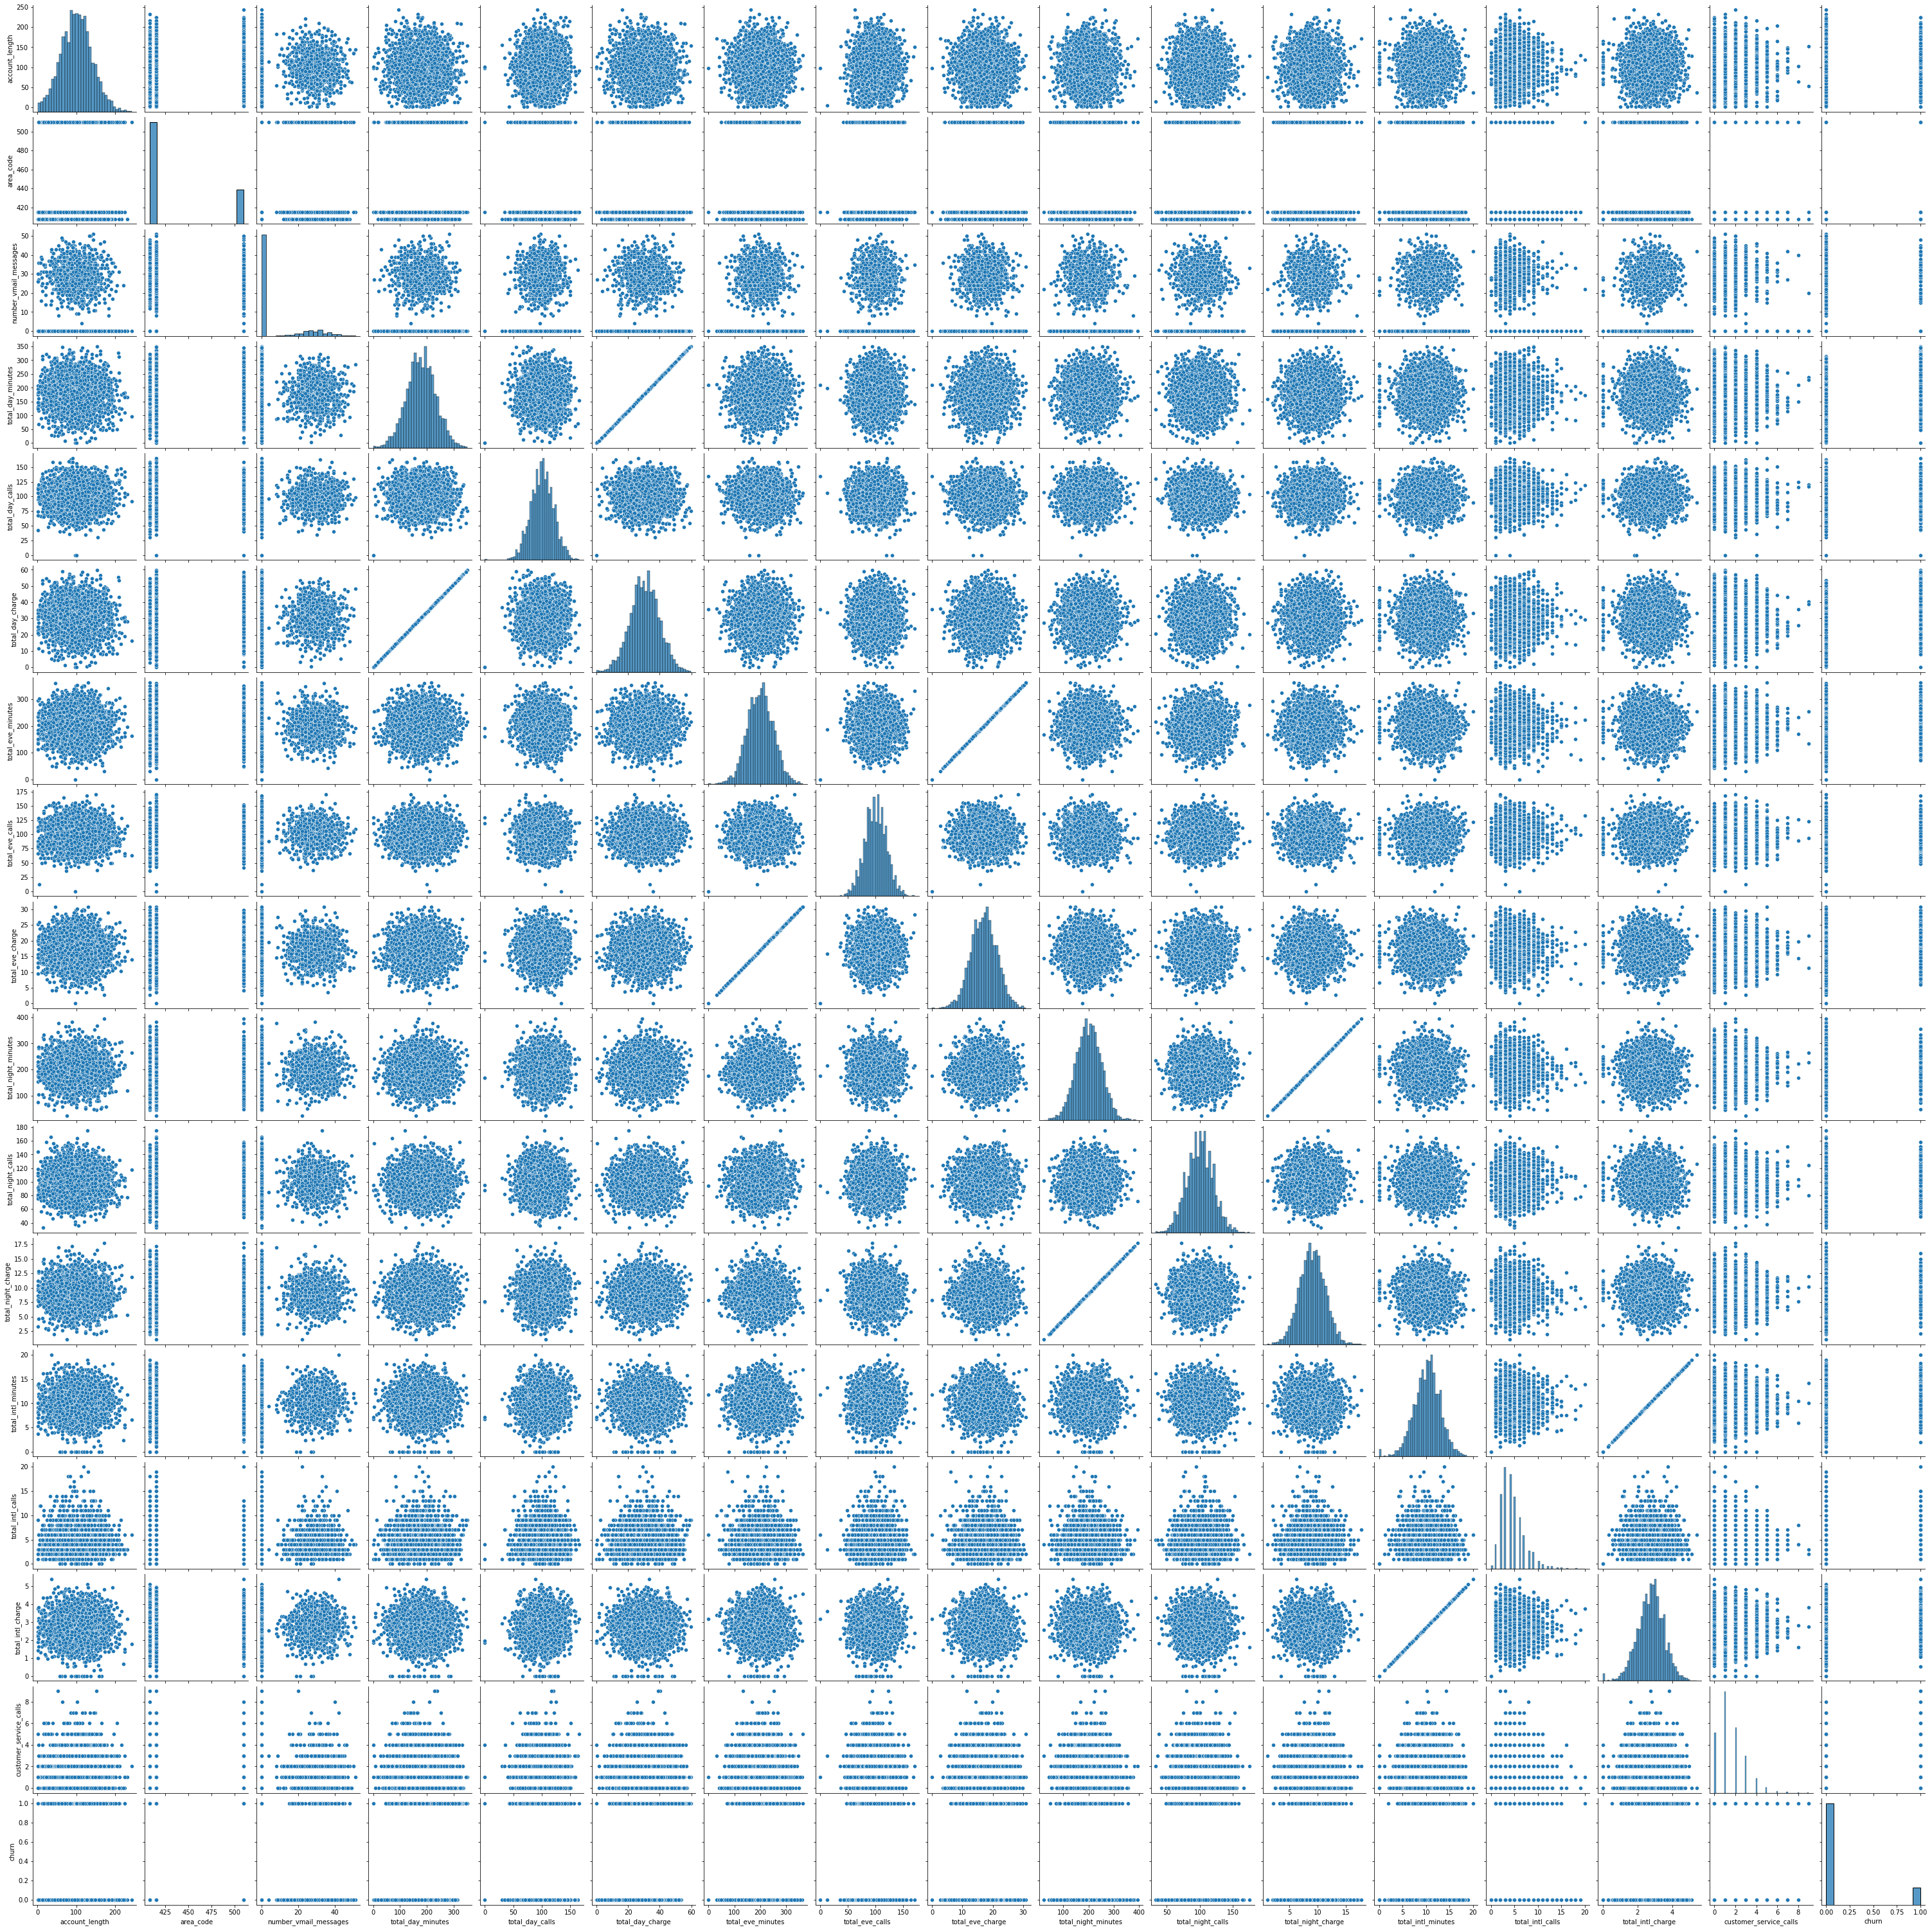

In [9]:
sns.pairplot(df)

### Exploring distribution of voicemail message column

/Users/dan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

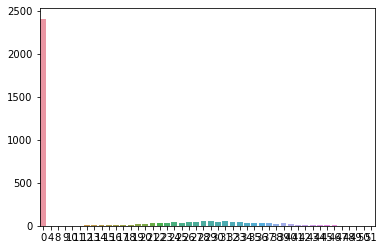

In [10]:
num_vmail_messages = df["number_vmail_messages"].value_counts()

sns.barplot(
    num_vmail_messages.index,
    num_vmail_messages.values,
)

### Cleaning extraneous features

In [11]:
# Dropping 'state' (51 unique values) since 'area_code' (3 unique values) 
#      still gives location data with much less noise
# Dropping 'number_vmail_messages' to reduce noise since the binary value 
#      in 'voice_mail_plan' should suffice
# Dropping 'phone_number' because there are 3333 unique values and should 
#      have no affect on predicting churn
df.drop(['state', 'phone_number', 'number_vmail_messages'],
        axis=1,
        inplace=True)

In [12]:
df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [13]:
# Dropping charges columns to eliminate multicollinearity
df.drop([
    'total_day_charge', 'total_eve_charge', 'total_night_charge',
    'total_intl_charge'
],
        axis=1,
        inplace=True)

### Checking for outliers

In [14]:
df.describe()

account_length    area_code  total_day_minutes  total_day_calls  \
count     3333.000000  3333.000000        3333.000000      3333.000000   
mean       101.064806   437.182418         179.775098       100.435644   
std         39.822106    42.371290          54.467389        20.069084   
min          1.000000   408.000000           0.000000         0.000000   
25%         74.000000   408.000000         143.700000        87.000000   
50%        101.000000   415.000000         179.400000       101.000000   
75%        127.000000   510.000000         216.400000       114.000000   
max        243.000000   510.000000         350.800000       165.000000   

       total_eve_minutes  total_eve_calls  total_night_minutes  \
count        3333.000000      3333.000000          3333.000000   
mean          200.980348       100.114311           200.872037   
std            50.713844        19.922625            50.573847   
min             0.000000         0.000000            23.200000   
25%           166.600000        87.000000           167.000000   
50%           201.400000       100.000000           201.200000   
75%           235.300000       114.000000           235.300000   
max           363.700000       170.000000           395.000000   

       total_night_calls  total_intl_minutes  total_intl_calls  \
count        3333.000000         3333.000000       3333.000000   
mean          100.107711           10.237294          4.479448   
std            19.568609            2.791840          2.461214   
min            33.000000            0.000000          0.000000   
25%            87.000000            8.500000          3.000000   
50%           100.000000           10.300000          4.000000   
75%           113.000000           12.100000          6.000000   
max           175.000000           20.000000         20.000000   

       customer_service_calls  
count             3333.000000  
mean                 1.562856  
std                  1.315491  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  9.000000

No outliers found

## Modeling

### Model-less Baseline

In [15]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

Our model-less baseline says we can accurately predict the majority class (no churn) at a 85.5% success rate if we only guess the majority class.

### Define X and y

In [16]:
X = df.drop('churn', axis=1)
y = df['churn']

### Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

### Handle categorical columns

In [18]:
# One Hot Encode 'area_code',  'international_plan', and 'voice_mail_plan'
ohe = OneHotEncoder(sparse=False, drop='first')

X_cats_train = ohe.fit_transform(
    X_train[['area_code', 'international_plan', 'voice_mail_plan']])
X_cats_test = ohe.transform(
    X_test[['area_code', 'international_plan', 'voice_mail_plan']])

In [19]:
ohe.get_feature_names()

array(['x0_415', 'x0_510', 'x1_yes', 'x2_yes'], dtype=object)

In [20]:
# Back to a df
X_cats_train = pd.DataFrame(X_cats_train, columns=ohe.get_feature_names())
X_cats_test = pd.DataFrame(X_cats_test, columns=ohe.get_feature_names())

X_cats_train.head()

x0_415  x0_510  x1_yes  x2_yes
0     1.0     0.0     0.0     0.0
1     1.0     0.0     0.0     1.0
2     0.0     1.0     0.0     1.0
3     0.0     0.0     1.0     1.0
4     0.0     1.0     0.0     0.0

### Standard scale

In [21]:
scaler = StandardScaler()

X_num_train = scaler.fit_transform(X_train[[
    c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])
]])
X_num_test = scaler.transform(
    X_test[[c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])]])

In [22]:
# Back to a df
X_num_train = pd.DataFrame(
    X_num_train,
    columns=[c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])])
X_num_test = pd.DataFrame(
    X_num_test,
    columns=[c for c in X.columns if X[c].dtype in (['int64'] or ['float64'])])
X_num_train.head()

account_length  area_code  total_day_calls  total_eve_calls  \
0       -0.814990  -0.516215         0.314915         0.082753   
1        0.764260  -0.516215        -2.034434        -1.116512   
2       -0.338708   1.738922         0.614832        -1.866052   
3       -0.138168  -0.682383         0.414887        -0.067155   
4        1.541351   1.738922         0.814777         1.032170   

   total_night_calls  total_intl_calls  customer_service_calls  
0           0.364534         -0.593606                0.328493  
1           1.080998         -0.185627               -0.425386  
2          -0.607810         -1.409563                1.082372  
3          -0.914865         -1.001584               -1.179266  
4          -0.556634          2.670222               -0.425386

In [23]:
# Column 'area_code' was already OHE so we need to drop it
X_num_train.drop('area_code', axis=1, inplace=True)
X_num_test.drop('area_code', axis=1, inplace=True)

In [24]:
X_num_train.head()

account_length  total_day_calls  total_eve_calls  total_night_calls  \
0       -0.814990         0.314915         0.082753           0.364534   
1        0.764260        -2.034434        -1.116512           1.080998   
2       -0.338708         0.614832        -1.866052          -0.607810   
3       -0.138168         0.414887        -0.067155          -0.914865   
4        1.541351         0.814777         1.032170          -0.556634   

   total_intl_calls  customer_service_calls  
0         -0.593606                0.328493  
1         -0.185627               -0.425386  
2         -1.409563                1.082372  
3         -1.001584               -1.179266  
4          2.670222               -0.425386

In [25]:
# put X back together
X_train_processed = pd.concat([X_num_train, X_cats_train], axis=1)
X_test_processed = pd.concat([X_num_test, X_cats_test], axis=1)

X_train_processed.head()

account_length  total_day_calls  total_eve_calls  total_night_calls  \
0       -0.814990         0.314915         0.082753           0.364534   
1        0.764260        -2.034434        -1.116512           1.080998   
2       -0.338708         0.614832        -1.866052          -0.607810   
3       -0.138168         0.414887        -0.067155          -0.914865   
4        1.541351         0.814777         1.032170          -0.556634   

   total_intl_calls  customer_service_calls  x0_415  x0_510  x1_yes  x2_yes  
0         -0.593606                0.328493     1.0     0.0     0.0     0.0  
1         -0.185627               -0.425386     1.0     0.0     0.0     1.0  
2         -1.409563                1.082372     0.0     1.0     0.0     1.0  
3         -1.001584               -1.179266     0.0     0.0     1.0     1.0  
4          2.670222               -0.425386     0.0     1.0     0.0     0.0

### Rename categorical columns

In [26]:
X_train_processed = X_train_processed.rename(columns={
    "x1_yes": "int_plan_yes",
    "x2_yes": "vmail_plan_yes"
})
X_test_processed = X_test_processed.rename(columns={
    "x1_yes": "int_plan_yes",
    "x2_yes": "vmail_plan_yes"
})

In [27]:
X_train_processed.head()

account_length  total_day_calls  total_eve_calls  total_night_calls  \
0       -0.814990         0.314915         0.082753           0.364534   
1        0.764260        -2.034434        -1.116512           1.080998   
2       -0.338708         0.614832        -1.866052          -0.607810   
3       -0.138168         0.414887        -0.067155          -0.914865   
4        1.541351         0.814777         1.032170          -0.556634   

   total_intl_calls  customer_service_calls  x0_415  x0_510  int_plan_yes  \
0         -0.593606                0.328493     1.0     0.0           0.0   
1         -0.185627               -0.425386     1.0     0.0           0.0   
2         -1.409563                1.082372     0.0     1.0           0.0   
3         -1.001584               -1.179266     0.0     0.0           1.0   
4          2.670222               -0.425386     0.0     1.0           0.0   

   vmail_plan_yes  
0             0.0  
1             1.0  
2             1.0  
3             1.0  
4             0.0

### Model selection and optimization strategy: Prioritize Recall
For all following models, we will evaluate and optimize for:
1. Recall - Our company can afford false positives more than it can afford false negatives. If actual churners fall through the cracks (false negative), the company can lose much more than if it incorrectly incentivizes non-churning customers (false positive) to stay
2. F1 score, Accuracy - For general correctness

### Logistic Regression

In [28]:
# Instantiate and fit model
# balancing class weight because classes are substantially uneven
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(X_train_processed, y_train)

LogisticRegression(class_weight='balanced')

In [29]:
logreg.coef_

array([[ 0.05389734,  0.04227399,  0.03065284,  0.06313797, -0.13013144,
         0.52637193, -0.04148489,  0.14560768,  2.12542236, -0.95186353]])

In [30]:
logreg.intercept_

array([-0.24316678])

#### Define evaluation function
Credit: Lindsey Berlin from 'Lesson 32 Pipelines' notebook

In [31]:
def evaluate(estimator, X_train, X_test, y_train, y_test, roc_auc='proba'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set

    roc_auc allows you to set how to calculate the roc_auc score: 
    'dec' for decision_function or 'proba' for predict_proba 
    If roc_auc == 'skip', then it ignores calculating the roc_auc_score

    Function takes in:
    'estimator' object
    'X_train' dataframe
    'X_test' dataframe
    'y_train' series
    'y_test' series
    'roc_auc' hyperparameter
    '''
    # grab predictions
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)

    # output needed for roc_auc_score
    if roc_auc == 'skip':  # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec':  # not all classifiers have decision_function
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif roc_auc == 'proba':
        train_out = estimator.predict_proba(
            X_train)[:, 1]  # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception(
            "The value for roc_auc should be 'skip', 'dec' or 'proba'.")

    # print scores
    print("Train Scores")
    print("------------")
    print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
    print(f"Precision: {precision_score(y_train, train_preds)}")
    print(f"Recall: {recall_score(y_train, train_preds)}")
    print(f"F1 Score: {f1_score(y_train, train_preds)}")
    if type(train_out) == np.ndarray:  # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
    print("----" * 5)
    print("Test Scores")
    print("-----------")
    print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
    print(f"Precision: {precision_score(y_test, test_preds)}")
    print(f"Recall: {recall_score(y_test, test_preds)}")
    print(f"F1 Score: {f1_score(y_test, test_preds)}")
    if type(test_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")

    # plot test confusion matrix
    plot_confusion_matrix(estimator, X_test, y_test, values_format=',.5g')
    plt.grid(False)
    plt.show()

Train Scores
------------
Accuracy: 0.7308553515450067
Precision: 0.2931547619047619
Recall: 0.6099071207430341
F1 Score: 0.39597989949748746
ROC-AUC: 0.7445236898837794
--------------------
Test Scores
-----------
Accuracy: 0.7190909090909091
Precision: 0.28023598820059
Recall: 0.59375
F1 Score: 0.3807615230460922
ROC-AUC: 0.7403989361702128


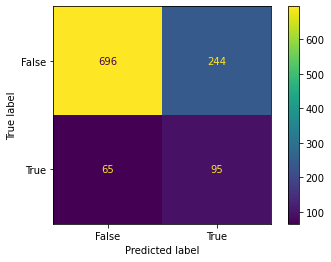

In [32]:
evaluate(logreg, X_train_processed, X_test_processed, y_train, y_test, roc_auc='proba')

Slightly overfit. Excellent recall but overall accuracy and F1 are low.

### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=3)

Train Scores
------------
Accuracy: 0.8943125839677564
Precision: 0.7919463087248322
Recall: 0.3653250773993808
F1 Score: 0.5
ROC-AUC: 0.9292869531389298
--------------------
Test Scores
-----------
Accuracy: 0.8454545454545455
Precision: 0.4107142857142857
Recall: 0.14375
F1 Score: 0.21296296296296297
ROC-AUC: 0.5930784574468085


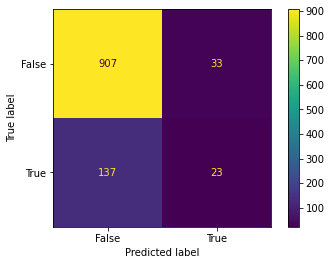

In [34]:
evaluate(knn,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Train Scores
------------
Accuracy: 0.8781907747424988
Precision: 0.8
Recall: 0.21052631578947367
F1 Score: 0.3333333333333333
ROC-AUC: 0.8873300050248811
--------------------
Test Scores
-----------
Accuracy: 0.8572727272727273
Precision: 0.5405405405405406
Recall: 0.125
F1 Score: 0.20304568527918782
ROC-AUC: 0.6303025265957447


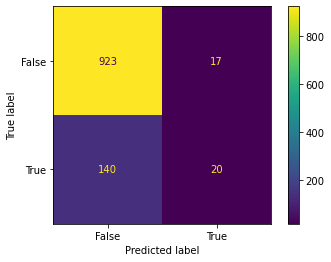

In [35]:
knn_2 = KNeighborsClassifier(n_neighbors=5)
knn_2.fit(X_train_processed, y_train)
evaluate(knn_2,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Train Scores
------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
--------------------
Test Scores
-----------
Accuracy: 0.8427272727272728
Precision: 0.38596491228070173
Recall: 0.1375
F1 Score: 0.20276497695852533
ROC-AUC: 0.5976529255319148


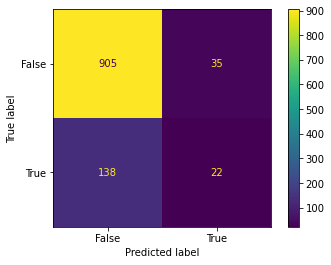

In [36]:
knn_3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_3.fit(X_train_processed, y_train)
evaluate(knn_3,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Recall for all KNN models are too low for consideration (knn, knn_2), or way overfit (knn_3)

### Decision Tree Classifier


Train Scores
------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0
--------------------
Test Scores
-----------
Accuracy: 0.8072727272727273
Precision: 0.33544303797468356
Recall: 0.33125
F1 Score: 0.3333333333333333
ROC-AUC: 0.6097739361702128


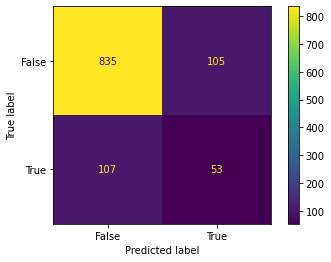

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_processed, y_train)
evaluate(dt,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Way overfit

Train Scores
------------
Accuracy: 0.8571428571428571
Precision: 0.5056497175141242
Recall: 0.5541795665634675
F1 Score: 0.5288035450516986
ROC-AUC: 0.8073817126740473
--------------------
Test Scores
-----------
Accuracy: 0.8254545454545454
Precision: 0.4090909090909091
Recall: 0.45
F1 Score: 0.4285714285714286
ROC-AUC: 0.7179787234042553


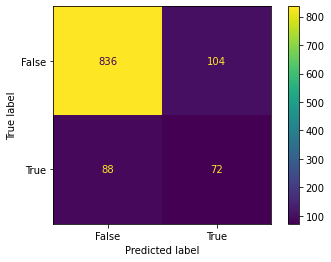

In [38]:
dt_2 = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_2.fit(X_train_processed, y_train)
evaluate(dt_2,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Train Scores
------------
Accuracy: 0.8705776981639051
Precision: 0.5472222222222223
Recall: 0.6099071207430341
F1 Score: 0.5768667642752563
ROC-AUC: 0.8599492649084985
--------------------
Test Scores
-----------
Accuracy: 0.8036363636363636
Precision: 0.3526315789473684
Recall: 0.41875
F1 Score: 0.38285714285714284
ROC-AUC: 0.6472905585106383


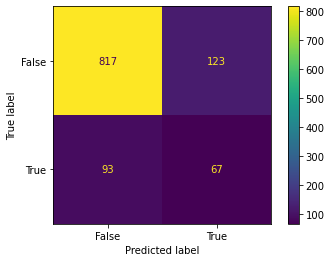

In [39]:
dt_3 = DecisionTreeClassifier(max_depth=7, class_weight='balanced')
dt_3.fit(X_train_processed, y_train)
evaluate(dt_3,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Moderately overfit. Accuracy and F1 scores are good, but recall scores are inconsistent

### Random Forest

Train Scores
------------
Accuracy: 0.8575906851768921
Precision: 0.5072886297376094
Recall: 0.5386996904024768
F1 Score: 0.5225225225225225
ROC-AUC: 0.8567390141507141
--------------------
Test Scores
-----------
Accuracy: 0.84
Precision: 0.4550561797752809
Recall: 0.50625
F1 Score: 0.4792899408284023
ROC-AUC: 0.7572007978723405


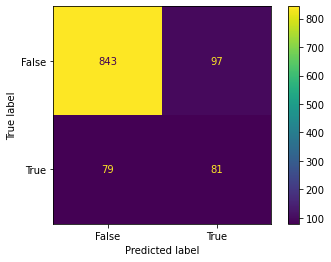

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5,
                            n_estimators=100,
                            random_state=42,
                            class_weight='balanced')
rf.fit(X_train_processed, y_train)
evaluate(rf,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Slightly overfit. Good balance of consistent and high recall, F1 and accuracy scores.

### AdaBoost


Train Scores
------------
Accuracy: 0.877742946708464
Precision: 0.6838235294117647
Recall: 0.28792569659442724
F1 Score: 0.40522875816993464
ROC-AUC: 0.8280590990874168
--------------------
Test Scores
-----------
Accuracy: 0.8618181818181818
Precision: 0.5606060606060606
Recall: 0.23125
F1 Score: 0.32743362831858414
ROC-AUC: 0.7003922872340425


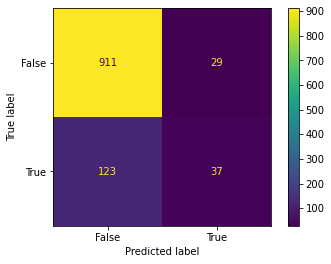

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42, n_estimators=50)
ada.fit(X_train_processed, y_train)
evaluate(ada,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Slightly overfit. Great accuracy score, but F1 and recall scores are too low for consideration.

### XGBoost

Train Scores
------------
Accuracy: 0.9081952530228392
Precision: 0.927536231884058
Recall: 0.39628482972136225
F1 Score: 0.5553145336225597
ROC-AUC: 0.8315594962151298
--------------------
Test Scores
-----------
Accuracy: 0.8709090909090909
Precision: 0.6363636363636364
Recall: 0.2625
F1 Score: 0.3716814159292035
ROC-AUC: 0.7600398936170213


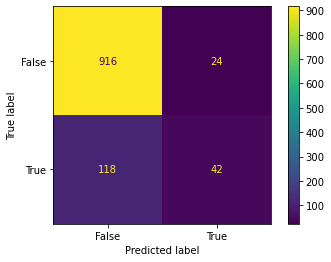

In [42]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb.fit(X_train_processed, y_train)
evaluate(xgb,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Overfit. Excellent accuracy score but recall is too low for consideration.

### GBM

Train Scores
------------
Accuracy: 0.9055082848186297
Precision: 0.9117647058823529
Recall: 0.38390092879256965
F1 Score: 0.5403050108932462
ROC-AUC: 0.8763392929505778
--------------------
Test Scores
-----------
Accuracy: 0.8690909090909091
Precision: 0.6481481481481481
Recall: 0.21875
F1 Score: 0.3271028037383178
ROC-AUC: 0.7366422872340426


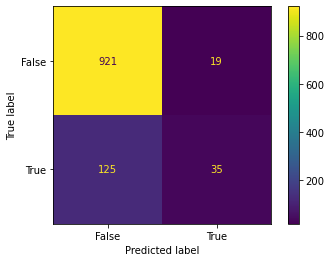

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(learning_rate=0.1, random_state=42)
gbm.fit(X_train_processed, y_train)
evaluate(gbm,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

Overfit. Excellent accuracy score but recall is too low for consideration.

### Grid Search optimization for Random Forest

In [44]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [250, 500, 750],
    'max_depth': [None, 1, 5],
    'max_leaf_nodes': [10, 50, 75],
}

rf_gridsearch = RandomForestClassifier(class_weight='balanced')

# Instantiate gridsearch
clf = GridSearchCV(rf_gridsearch, params, scoring='f1_macro')

clf.fit(X_train_processed, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 1, 5],
                         'max_leaf_nodes': [10, 50, 75],
                         'n_estimators': [250, 500, 750]},
             scoring='f1_macro')

### Fit all training data on optimized paramaters

In [45]:
clf.best_params_

{'max_depth': None, 'max_leaf_nodes': 75, 'n_estimators': 750}

Train Scores
------------
Accuracy: 0.9023734885803851
Precision: 0.6377952755905512
Recall: 0.7523219814241486
F1 Score: 0.6903409090909091
ROC-AUC: 0.9628191204836855
--------------------
Test Scores
-----------
Accuracy: 0.8481818181818181
Precision: 0.47928994082840237
Recall: 0.50625
F1 Score: 0.49240121580547114
ROC-AUC: 0.7525


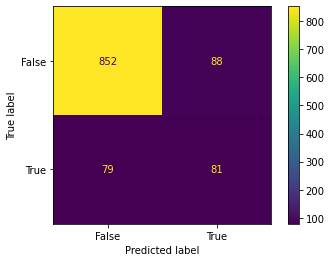

In [49]:
rf_best = RandomForestClassifier(max_depth=None,
                                 max_leaf_nodes=75,
                                 n_estimators=750,
                                 random_state=42,
                                 class_weight='balanced')
rf_best.fit(X_train_processed, y_train)
evaluate(rf_best,
         X_train_processed,
         X_test_processed,
         y_train,
         y_test,
         roc_auc='proba')

### Grab Feature Importances

In [47]:
features = rf_best.feature_importances_
feature_importances = dict(zip(X_test_processed.columns, features))
feature_importances

{'account_length': 0.12699846644879095,
 'total_day_calls': 0.12160293116487564,
 'total_eve_calls': 0.11682301368779253,
 'total_night_calls': 0.12274062692909635,
 'total_intl_calls': 0.07361384106199834,
 'customer_service_calls': 0.20647091756984842,
 'x0_415': 0.014996264050561503,
 'x0_510': 0.013554383047486402,
 'int_plan_yes': 0.15728581611083745,
 'vmail_plan_yes': 0.04591373992871253}

### Plot Feature Importances

[0.12699847 0.12160293 0.11682301 0.12274063 0.07361384 0.20647092
 0.01499626 0.01355438 0.15728582 0.04591374]


<AxesSubplot:>

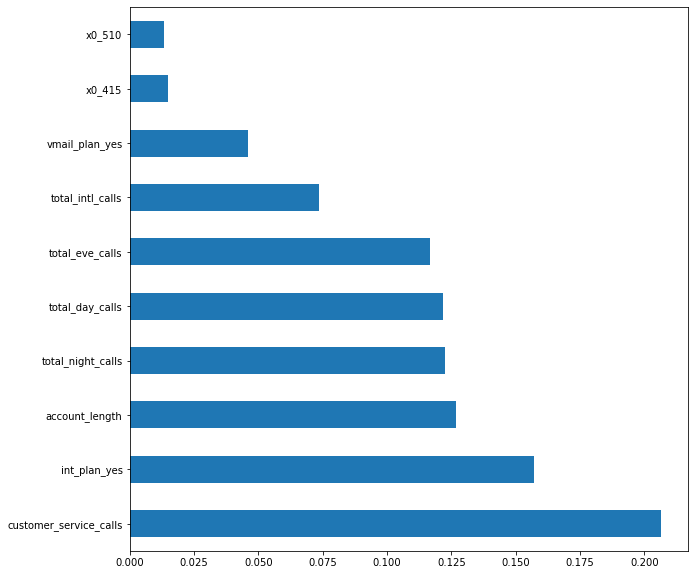

In [48]:
features = rf_best.feature_importances_
print(rf_best.feature_importances_)
feature_importances = pd.Series(rf_best.feature_importances_,
                                index=X_train_processed.columns)
feature_importances = feature_importances.nlargest(10)
feature_importances.plot(kind='barh', figsize=(10, 10))

## Evaluation
After model selection and optimization over many iterations, the resulting findings are:
1. We can reliably predict customer churn with 84.5% accuracy. This is similar to the model-less baseline (85.5%). Why is our final model better than the model-less baseline? If the company guesses all of their customers as the majority class (not churn), this will not get them anywhere in targeting potential churners. Using our model will give quality guesses at who is likely to churn.
2. Higher total **customer service calls** and having an **international plan** are possible starting points in identifying customers who are prone to churn.

### Recommendations

1. Use our final model to identify customers who are soon likely to churn. Offering these customers special incentives to stay may significantly decrease monthly/yearly churn.
2. Volume of customer service calls and having an international plan can help with early detection. Also consider improving the quality of these experiences to offer customers a better product, increasing their chances to stay.

### Next Steps

It could be worth using Grid Search on other promising models to see if we can get better results.